In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from plotly import graph_objects as go

In [52]:
netflix = pd.read_csv('/content/netflix_titles.csv') # Считываем Dataset.

In [53]:
netflix.head(5) # Посмотрим на первые пять строк таблицы.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [54]:
netflix.info() # Смотрим сводную информацию по таблице(пропуски, типы объектов)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [55]:
"""Тип столбца date_added: object, сменим его на Datetime64 """
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [56]:
""" Dataset должен состоять из двух видов видео: фильмы и сериалы.
    Проверим так ли это.
"""
netflix['type'].unique() 

array(['Movie', 'TV Show'], dtype=object)

> Сначало проведем анализ всей таблици, а потом фильмов и сариалов отдельно.



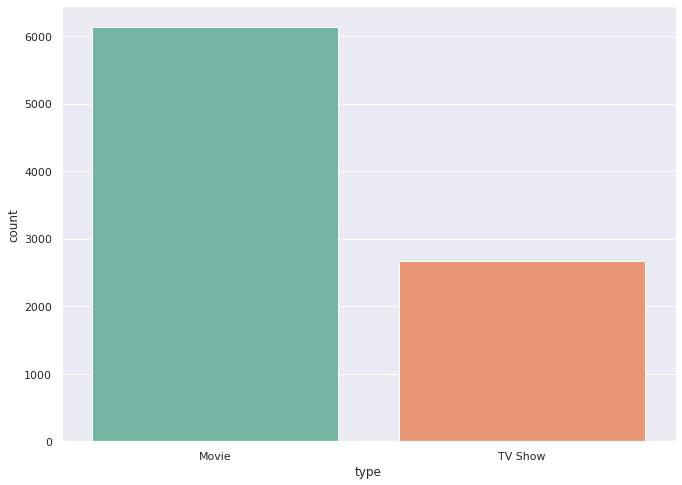

In [57]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix, palette='Set2')

Как видно количество фильмов загружено на Netflix больше в два раза, чем сериалов.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


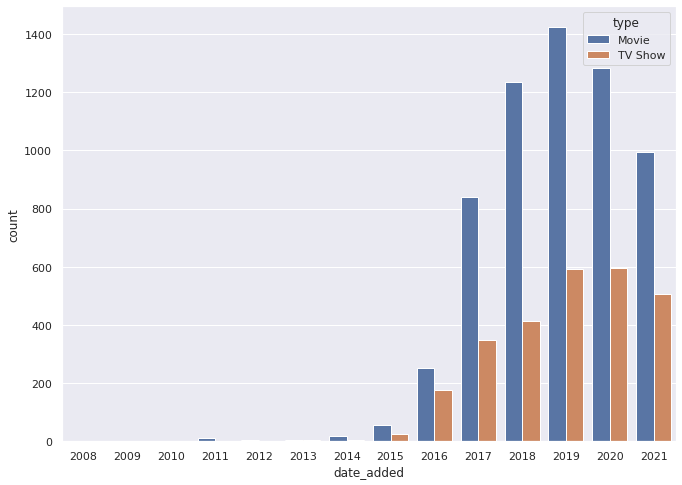

In [58]:
"""Посмотрим на динамику добавление фильмов и сериалов на Netflix"""

year_of_addition = netflix[['date_added', 'type']]
year_of_addition.loc[:, ['date_added']] = year_of_addition['date_added'].dt.year

if year_of_addition['date_added'].isna().any():
    year_of_addition.dropna(subset=['date_added'], inplace=True)

year_of_addition = year_of_addition.astype({'date_added': 'int'})
year_of_addition

# fig = plt.Figure(figsize=(7, 7))
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(x='date_added', hue='type', data=year_of_addition, )

In [59]:
"""Какие страны чаще всего учавствуют в создании фильмов и сериалов"""

netflix['country'].isna().sum() # Количество значений nan.

831

In [60]:
netflix['country'].value_counts() # Все значания в столбце "country" с частотностью.

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [61]:
netflix_country = netflix[['type', 'country']]
netflix_country.dropna(subset=['country'], inplace=True)
netflix_country

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,type,country
0,Movie,United States
1,TV Show,South Africa
4,TV Show,India
7,Movie,"United States, Ghana, Burkina Faso, United Kin..."
8,TV Show,United Kingdom
...,...,...
8801,Movie,"United Arab Emirates, Jordan"
8802,Movie,United States
8804,Movie,United States
8805,Movie,United States


In [62]:
if netflix['country'].isna().any():
    print('В столбце "country" нет пропусков.')
else:
    print('В столбце "country" остались пропуски.')

В столбце "country" нет пропусков.


In [63]:
netflix['country'].unique().shape # 

(749,)

In [64]:
set_country = {i.replace(',', '').strip() 
                    for lst in netflix_country['country'].apply(lambda x: x.split(sep=', '))
                    for i in lst}
set_country 

{'',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Nigeria',
 'Nor

In [65]:
set_country.discard('') # Удаляем элемент '' из множества.
print(len(set_country)) # Количество стран

122


In [66]:
netflix_country['count_country'] = netflix_country['country'].apply(lambda x: len(x.split(sep=',')))
netflix_country


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,type,country,count_country
0,Movie,United States,1
1,TV Show,South Africa,1
4,TV Show,India,1
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",6
8,TV Show,United Kingdom,1
...,...,...,...
8801,Movie,"United Arab Emirates, Jordan",2
8802,Movie,United States,1
8804,Movie,United States,1
8805,Movie,United States,1


In [67]:
netflix_country['count_country'][netflix_country['type'] == 'TV Show'].value_counts()

1    2040
2     174
3      46
4      17
5       4
6       3
8       1
Name: count_country, dtype: int64

In [68]:
netflix_country['count_country'][netflix_country['type'] == 'Movie'].value_counts()

1     4616
2      699
3      227
4       97
5       33
6       11
7        5
8        1
12       1
10       1
Name: count_country, dtype: int64

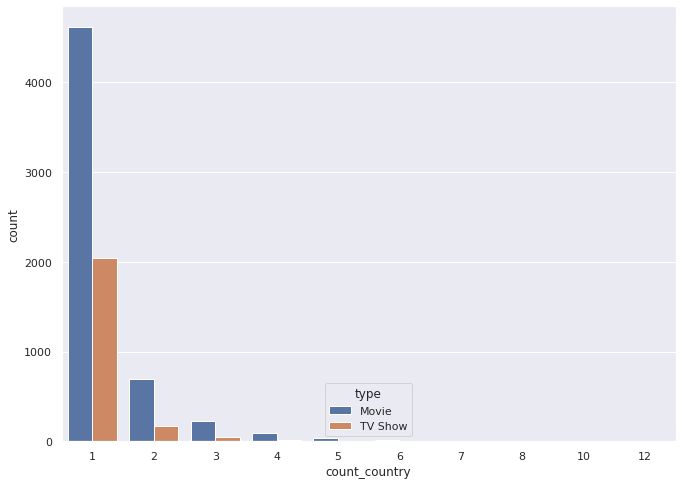

In [69]:
sns.countplot(x='count_country', data=netflix_country, hue='type', )

In [70]:
country_often_appear = netflix_country['country'].value_counts(normalize=True).iloc[:10]
country_often_appear.values

array([0.35330993, 0.1218656 , 0.0525326 , 0.03071715, 0.02494985,
       0.02269308, 0.01817954, 0.01554664, 0.01379137, 0.01328987])

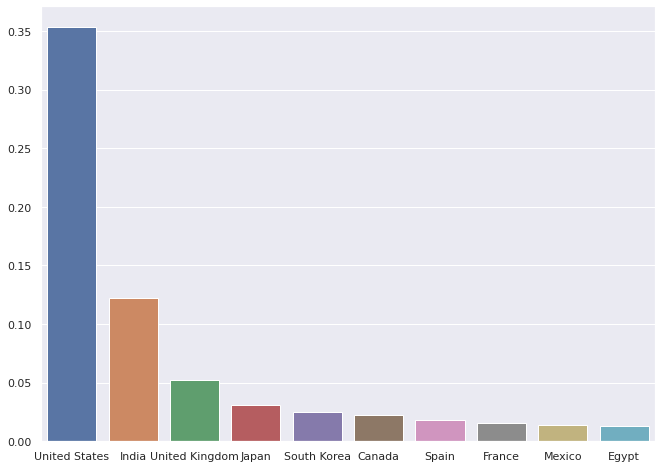

In [71]:
sns.barplot(x=country_often_appear.index, y=country_often_appear.values)

In [93]:
def func(df: pd.Series):

    two_countries_counts = []
    flag = True

    for two_countries, counts in zip(df.index, df.values):

        list_two_countries = two_countries.split(sep=', ')

        if flag:
            two_countries_counts.append([list_two_countries, counts])
            flag = False

            continue

        for i in two_countries_counts:
            if list_two_countries[0] in i[0] and list_two_countries[1] in i[0]:
                i[1] += counts

                break
        else:
            two_countries_counts.append([list_two_countries, counts])

    return two_countries_counts


country_often_appear = netflix_country['country']\
                                             [netflix_country['count_country'] == 2].\
                                             value_counts()
country_often_appear

United Kingdom, United States    75
United States, Canada            73
United States, United Kingdom    47
Canada, United States            45
France, Belgium                  27
                                 ..
Brazil, United States             1
India, Turkey                     1
Philippines, Singapore            1
Germany, Italy                    1
United Arab Emirates, Jordan      1
Name: country, Length: 282, dtype: int64

In [94]:
two_countries_counts = func(country_often_appear)
two_countries_counts

[[['United Kingdom', 'United States'], 122],
 [['United States', 'Canada'], 118],
 [['France', 'Belgium'], 30],
 [['United States', 'Germany'], 30],
 [['Hong Kong', 'China'], 30],
 [['United States', 'Japan'], 28],
 [['United States', 'France'], 26],
 [['United States', 'Mexico'], 27],
 [['Australia', 'United States'], 24],
 [['India', 'United States'], 19],
 [['Argentina', 'Spain'], 11],
 [['United States', 'China'], 10],
 [['United Kingdom', 'France'], 7],
 [['South Korea', 'United States'], 8],
 [['Italy', 'France'], 5],
 [['United States', 'Czech Republic'], 7],
 [['United States', 'New Zealand'], 7],
 [['India', 'France'], 5],
 [['Spain', 'France'], 5],
 [['United States', 'Italy'], 9],
 [['Israel', 'United States'], 5],
 [['United States', 'Spain'], 5],
 [['United States', 'Russia'], 5],
 [['South Africa', 'United States'], 7],
 [['Poland', 'United States'], 5],
 [['United States', 'Bulgaria'], 7],
 [['United Kingdom', 'Germany'], 6],
 [['Mexico', 'Spain'], 6],
 [['United Kingdom

In [95]:
sum_count_1 = 0

for i in two_countries_counts:
    sum_count_1 += i[1]

sum_count_2 = country_often_appear.values.sum()

if sum_count_1 == sum_count_2:
    print('Преобразование успешно')

Преобразование успешно


In [ ]:
two_countries_counts.sort(key=lambda v: v[1], reverse=True)
two_countries_counts

In [109]:
two_countries_counts = two_countries_counts[:10]

two_country = ['/ '.join(i[0]) for i in two_countries_counts]
two_country

['United Kingdom/ United States',
 'United States/ Canada',
 'France/ Belgium',
 'United States/ Germany',
 'Hong Kong/ China',
 'United States/ Japan',
 'United States/ Mexico',
 'United States/ France',
 'Australia/ United States',
 'India/ United States']

In [110]:
countries_counts = [i[1] for i in two_countries_counts]
countries_counts

[122, 118, 30, 30, 30, 28, 27, 26, 24, 19]

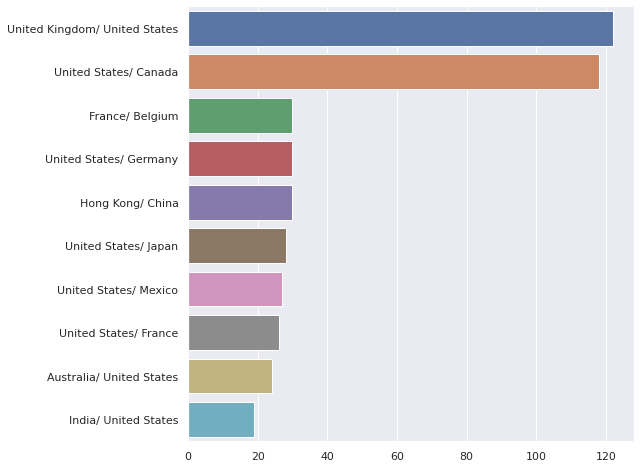

In [116]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=countries_counts, y=two_country)

In [75]:
netflix_movie = netflix[netflix['type'] == 'Movie'].copy()
netflix_TVShow = netflix[netflix['type'] == 'TV Show'].copy()

In [76]:
netflix_TVShow_vc = netflix_TVShow['duration'].value_counts()
netflix_TVShow_vc

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [77]:
netflix_movie_vc = netflix_movie['duration'].value_counts()
netflix_movie_vc

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [78]:
ind = netflix_movie[netflix_movie['duration'].isna()].index
netflix_movie[netflix_movie['duration'].isna()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [79]:
netflix_movie.dropna(subset=['duration'], inplace=True)
netflix_movie['duration'].isna().sum()

0

In [80]:
def from_object_in_int(duration):
    if type(duration) == str:
        return int(duration.split(sep=' ')[0])
    return duration


netflix_movie['duration'] = netflix_movie['duration'].apply(from_object_in_int)
netflix_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [81]:
netflix_movie_vc = netflix_movie['duration'].value_counts().sort_index()
netflix_movie_vc

3      1
5      1
8      1
9      1
10     1
      ..
233    1
237    1
253    1
273    1
312    1
Name: duration, Length: 205, dtype: int64

In [82]:
fig = go.Figure( [go.Bar(x=netflix_TVShow_vc.index, y=netflix_TVShow_vc.values)] )
fig.show()

In [83]:
fig = go.Figure( [go.Bar(x=netflix_movie_vc.index, y=netflix_movie_vc.values)] )
fig.show()

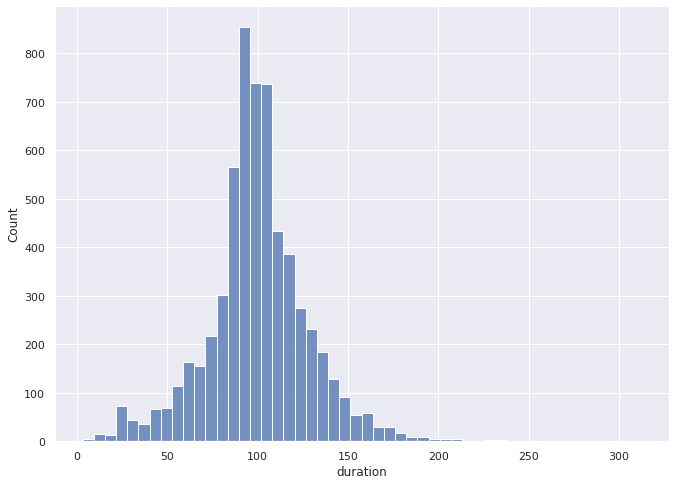

In [84]:
sns.histplot(netflix_movie['duration'], bins=50)

In [85]:
netflix_movie['duration'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

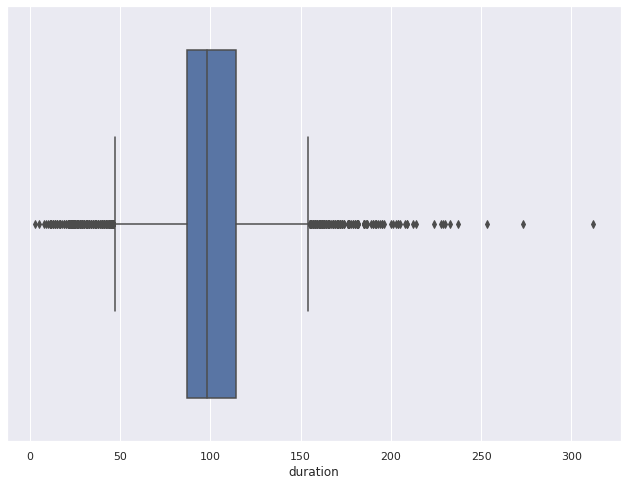

In [86]:
sns.boxplot(x=netflix_movie['duration'])

In [87]:
from scipy import stats

k2, p = stats.normaltest(netflix_movie['duration'])
p

7.621223665605874e-82

In [88]:
stats.kstest(netflix_movie['duration'], 'norm', alternative='two-sided')

KstestResult(statistic=0.999836527969838, pvalue=0.0)

> # **Проверить является ли это распределение нормальным, подсчитать среднее, дисперсию и тд.**

